# Part 3: Joining Data

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3

from utils import export

## Join Part 1 and Part 2 data to create a new dataframe

In [2]:
# Read in the DataFrames from Parts 1 & 2.
dirname = '../data/'
stations_df = pd.read_csv(dirname + 'stations_clean.csv', sep=',', index_col=False)
yelp_places_df = pd.read_csv(dirname + 'yelp_places_clean.csv', sep=',', index_col=False)
yelp_categories_df = pd.read_csv(dirname + 'yelp_categories_clean.csv', sep=',', index_col=False)

In [3]:
stations_df.sample(5)

,station_id,name,latitude,longitude,altitude,slots,free_bikes,empty_slots
60,af90684aa689f2f4ad0bca85018d06ec,S34 - Parque de los Reyes,-33.429219,-70.669310,546.0,23,15,8
196,c096dc861afc380850a1c9b9d640d371,P09 - Metro Francisco Bilbao,-33.430764,-70.586271,635.0,11,6,4
209,06d7c110b384129303c02a225ff0cecb,P02 - Italia / Marín,-33.443928,-70.625648,582.0,11,5,5
168,db285809af3a74928dbe26332486a4a6,S32 - Gorbea,-33.451742,-70.659621,548.0,11,6,5
198,a142351876dc5f6c8efca37a8963a934,LC100 - Estocolmo / Los Militares,-33.403871,-70.565809,703.0,11,6,5


In [4]:
yelp_places_df.sample(5)

,yelp_id,name,review_count,price,rating,distance,station_id
7578,B45kBL6rxN7G2udwz2epQw,Happy Salad & Sandwich,2,2.0,4.0,1063.283684,f3bb062edf6f6451b8f5a483bedeeca0
10187,MOEf0xytTeWkAJQRBIQlNw,El Ají Seco Místico,17,2.0,4.1,462.376335,dd858289d4a21b7980dc757bb2c601b6
4748,UWvTuvlyczn8WevKmnrPjQ,Minimarket Tupán,2,NaN,3.5,952.829568,bf174f25dd7f6bbedcc402f755743184
915,khPp42tTHf11q-YIc85_1g,Las carnes de Echaurren,1,NaN,4.0,105.118906,136ee88e6c70715f4b2b51658eb3a563
6610,BG2mMSUULPEWMOJ5O6j-9A,La Batuta,5,2.0,4.0,392.804728,cf82a49da234dca3281e8dabbf84a949


In [6]:
yelp_categories_df.sample(5)

,yelp_id,category_name
640,V0CokleO3TbOQv7QbJeVYw,burgers
252,MGMsBw3RG_qugo-mh5gVPA,ice cream & frozen yogurt
1822,Pa2FgmG2Eh-fLCB9RHvf2g,sports bars
1398,1_6JX1ddpvpK3va_e3HJHg,brasseries
1678,fXDtyqtQrYq-JKuf3MgdiA,lounges


Are there any station_ids that are in `stations_df` but not in `yelp_places_df`? (Spoiler: there shouldn't be!)

In [9]:
station_ids = set(stations_df['station_id'].to_list())
yelp_station_ids = set(yelp_places_df['station_id'].to_list())
ids_equal = station_ids.issubset(yelp_station_ids) and yelp_station_ids.issubset(station_ids)
print(f'station_ids sets equal: {ids_equal}')

station_ids sets equal: True


The sets of station_ids in `stations_df` and `yelp_places_df` are equal. Therefore, I'll (inner) merge (*i.e.* SQL join) these two tables on `station_id`. But, first, I'll rename a pair of columns to avoid future confusion.

In [10]:
stations_df.rename({'name': 'station_name'}, axis='columns', inplace=True)
yelp_places_df.rename({'name': 'place_name'}, axis='columns', inplace=True)

In [11]:
stations_places_df = stations_df.merge(yelp_places_df, how='inner', on='station_id')

In [12]:
stations_places_df.sample(5)

,station_id,station_name,latitude,longitude,altitude,slots,free_bikes,empty_slots,yelp_id,place_name,review_count,price,rating,distance
6801,633e9aef82af325e349212895633bc1a,N46 - Av. Irarrázaval / Suecia,-33.454407,-70.600099,590.0,14,7,7,tXwxfUhnNdWWukRLTNRVSQ,Balkan Grill,1,NaN,3.0,126.302012
7909,ad501b1938eccda3b2bdaac8fbfa3921,LC006 - Parque Titanium,-33.413638,-70.605777,628.0,11,11,0,lnagtjPVcCIUt7nqMzhJ4w,Le Due Torri,20,4.0,3.6,386.486468
1475,d066dd122e236fe52782b1bedba59537,P59 - Los Estanques,-33.435136,-70.608705,606.0,11,4,7,Xn7nHPyUmQlySvzRG0wkzQ,Parque Inés de Suárez,10,NaN,4.2,757.288956
8948,c560ed81fd684e176abe8fb531882b64,S27 - Teatinos / Huérfanos,-33.439790,-70.655155,585.0,17,6,11,COqOSJ1EIeGC91PcpgKpWQ,La Serrana,9,NaN,4.6,961.405594
4999,90498359a21240326d9a012426d4c9aa,LC022 - Tobalaba / Apoquindo,-33.418269,-70.601185,634.0,11,6,5,kPIXb_Tb1H5ye2-z-JE8HQ,Stone House,1,1.0,4.0,79.257257


Next, I'll merge `stations_places_df` with `yelp_categories_df` on `yelp_id`.

Are there any yelp_ids that are in `stations_places_df` that are not in `yelp_categories_df`? It's certainly possible that there are businesses returned by a Yelp search that don't have any associated categories.

In [13]:
yelp_ids_1 = set(stations_places_df['yelp_id'].to_list())
yelp_ids_2 = set(yelp_categories_df['yelp_id'].to_list())
print(f'num yelp IDs: {len(yelp_ids_1)}, {len(yelp_ids_2)}')
print(f'yelp_ids_2 contained in yelp_ids_1: {yelp_ids_2.issubset(yelp_ids_1)}')
yelp_id_diff = yelp_ids_1 - yelp_ids_2
print('yelp IDs in yelp_id_1 but not in yelp_id_2:')
for id in yelp_id_diff:
    print(f'    {id}')

num yelp IDs: 1756, 1748
yelp_ids_2 contained in yelp_ids_1: True
yelp IDs in yelp_id_1 but not in yelp_id_2:
    B45kBL6rxN7G2udwz2epQw
    pLh6ImLqAWPWNICWUz70Uw
    S3qk-oT76pT6G_VA4Y4j0w
    JcJrUd2jyEGUCYU99QtkUA
    g79bELS1rZheFdxkXmzKtw
    JX_Axp2MRPwmDhHUw0hZqw
    6XnJsC8OZyLuRoWN9wRmEA
    05SHJ9668PZQXIhMjp9ACA


To ensure that I keep all businesses in the final merged DataFrame, I'll left merge stations_places_df to yelp_categories_df. Note that a handful of businesses will have a category_name of NA.

In [14]:
stations_places_cats_df =\
    stations_places_df.merge(yelp_categories_df, how='left', on='yelp_id')

### Look at the data before and after the join to validate your data

In [15]:
stations_places_cats_df.head()

,station_id,station_name,latitude,longitude,altitude,slots,free_bikes,empty_slots,yelp_id,place_name,review_count,price,rating,distance,category_name
0,e1593acef03a0fd770595370586bc358,P31 - Estación Canal 13,-33.428334,-70.627312,599.0,13,6,7,8N6Y3HsLXHBeFwhlO0YxwQ,Barrica 94,78,2.0,4.3,988.631270,wine bars
1,e1593acef03a0fd770595370586bc358,P31 - Estación Canal 13,-33.428334,-70.627312,599.0,13,6,7,8N6Y3HsLXHBeFwhlO0YxwQ,Barrica 94,78,2.0,4.3,988.631270,chilean
2,e1593acef03a0fd770595370586bc358,P31 - Estación Canal 13,-33.428334,-70.627312,599.0,13,6,7,8N6Y3HsLXHBeFwhlO0YxwQ,Barrica 94,78,2.0,4.3,988.631270,cocktail bars
3,e1593acef03a0fd770595370586bc358,P31 - Estación Canal 13,-33.428334,-70.627312,599.0,13,6,7,U15KdCy6HH05WISNtN9plQ,Restaurant Peumayén,73,4.0,4.5,856.161401,latin american
4,e1593acef03a0fd770595370586bc358,P31 - Estación Canal 13,-33.428334,-70.627312,599.0,13,6,7,y2FR-JBGie4wiW6RjtKLhg,Aquí Está Coco,58,4.0,4.3,1099.691315,seafood


In [16]:
print(f'shape: {stations_places_cats_df.shape}')
print(f'columns:\n {stations_places_cats_df.columns}')
stations_places_cats_df.info()

shape: (15212, 15)
columns:
 Index(['station_id', 'station_name', 'latitude', 'longitude', 'altitude',
       'slots', 'free_bikes', 'empty_slots', 'yelp_id', 'place_name',
       'review_count', 'price', 'rating', 'distance', 'category_name'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15212 entries, 0 to 15211
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   station_id     15212 non-null  object 
 1   station_name   15212 non-null  object 
 2   latitude       15212 non-null  float64
 3   longitude      15212 non-null  float64
 4   altitude       15212 non-null  float64
 5   slots          15212 non-null  int64  
 6   free_bikes     15212 non-null  int64  
 7   empty_slots    15212 non-null  int64  
 8   yelp_id        15212 non-null  object 
 9   place_name     15212 non-null  object 
 10  review_count   15212 non-null  int64  
 11  price          10506 non-null  float64
 12  rat

In [17]:
export(stations_places_cats_df, 'stations_places_cats.csv')

### EDA with visualizations

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

#### `stations_df` 

I'll start off easy by looking at the columns of `stations_df` for interesting relationships pertaining to the number of bikes available.

array([[<Axes: title={'center': 'free_bikes'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'altitude'}>],
       [<Axes: title={'center': 'slots'}>,
        <Axes: title={'center': 'empty_slots'}>]], dtype=object)

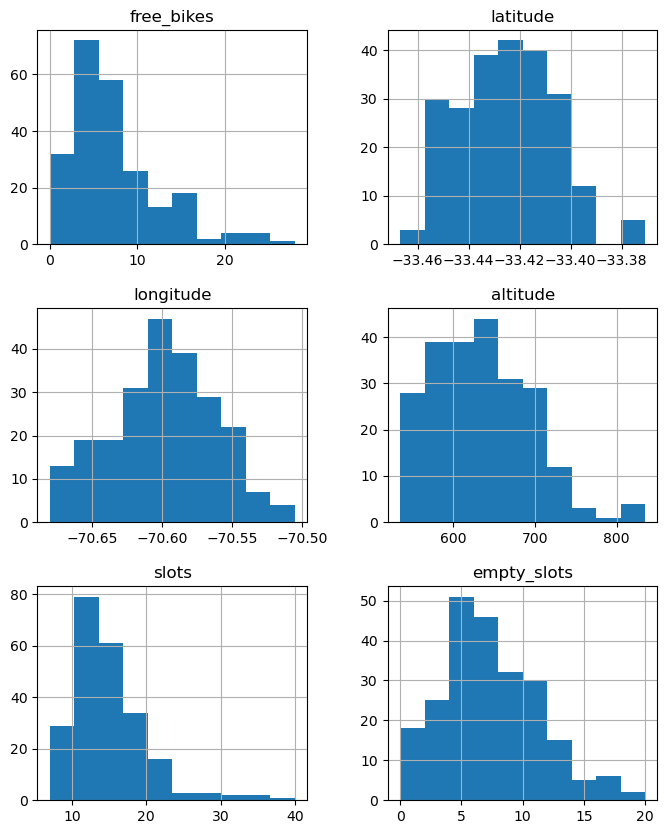

In [18]:
cols = ['free_bikes', 'latitude', 'longitude', 'altitude', 'slots', 'empty_slots']
stations_df[cols].hist(figsize=(8, 10))

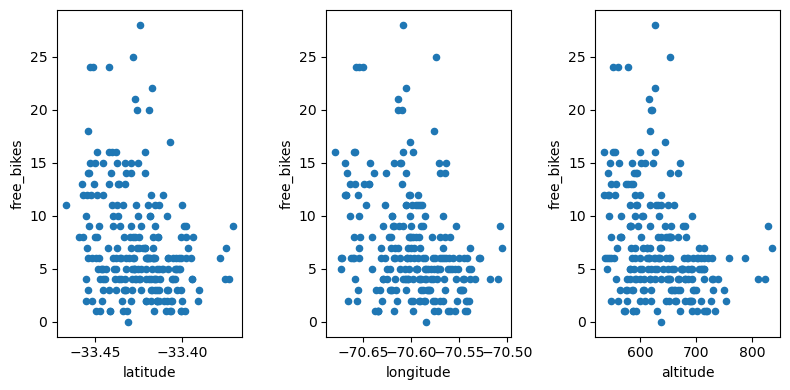

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
stations_df.plot.scatter(x='latitude', y='free_bikes', ax=axes[0])
stations_df.plot.scatter(x='longitude', y='free_bikes', ax=axes[1])
stations_df.plot.scatter(x='altitude', y='free_bikes', ax=axes[2])
fig.tight_layout()

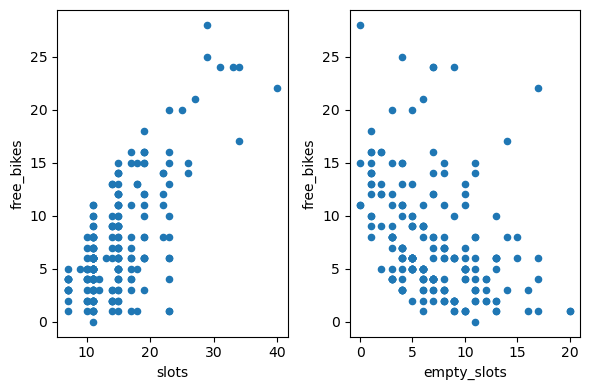

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4))
stations_df.plot.scatter(x='slots', y='free_bikes', ax=axes[0])
stations_df.plot.scatter(x='empty_slots', y='free_bikes', ax=axes[1])
fig.tight_layout()

<Axes: >

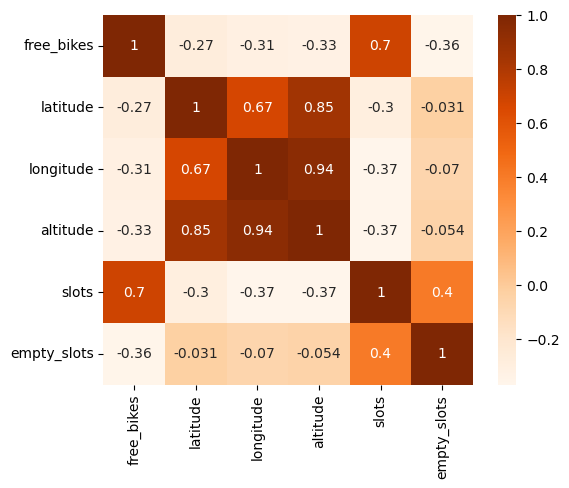

In [21]:
sns.heatmap(stations_df[cols].corr(), annot=True, square=True, cmap='Oranges')

#### Conclusions

Restricting attention to the columns of `stations_df`, the number of free bikes is moderately/strongly correlated with slots suggesting that, at larger bike stations, there is a higher chance of a bike being available. That seems pretty reasonable. I thought there would be a stronger negative correlation between the number of free bikes and altitude: my hunch was that people would be less likely to return bikes to high-altitude bike stations because they didn't want to cycle uphill. That doesn't seem to be the case however.

#### `stations_places_cats_df`

Next, I'll look for nontrivial relationships between the number of free bikes at a station and the number of nearby points of interest. I'll focus on total points of interest as well as total bars and total cafes more specifically.

In [22]:
def is_bar(category: str) -> bool:
    """
    Return True if category corresponds to a bar, False otherwise.

    Usage examples:
    >>> is_bar('dive bar')
    True
    >>> is_bar('korean barbeque')
    False
    """
    if not isinstance(category, str):    
        return False
        
    # search terms that indicate a bar
    bars = ['bar', 'pub', 'wine', 'brewery', 'breweries', 'lounge']

    # search terms that indicate not a bar
    not_bars = ['barbeque']
    
    contains_bar = any([category.find(b) >= 0 for b in bars])
    contains_not_bar = any([category.find(b) >= 0 for b in not_bars])
    return contains_bar and (not contains_not_bar)

In [23]:
def is_cafe(category: str) -> bool:
    """
    Return True if category corresponds to a cafe, False otherwise.

    Usage examples:
    >>> is_cafe('coffe & tea')
    True
    >>> is_cafe('steakhouse')
    False
    """
    if not isinstance(category, str):    
        return False
        
    # search terms that indicate a cafe
    cafes = ['cafe', 'coffee', 'tea']

    # search terms that indicate not a cafe
    not_cafes = ['steakhouse']
    
    contains_cafe = any([category.find(c) >= 0 for c in cafes])
    contains_not_cafe = any([category.find(c) >= 0 for c in not_cafes])
    return contains_cafe and (not contains_not_cafe)

Next, I'll construct a DataFrame with station_id as a primary key and with columns such as number of nearby POIs, number of nearby bars, and number of nearby cafes. Also, I'll include columns for average rating as well. Average prices would also be interesting, but that particular dataset is incomplete.

In [24]:
cols = ['station_id', 'rating', 'category_name']
tmp = stations_places_cats_df[cols]

In [26]:
pois = tmp.groupby(by='station_id')\
    .agg({'rating': 'mean', 'category_name': 'count'})
pois.columns = ['avg_poi_rating', 'num_pois']
pois.head()

,avg_poi_rating,num_pois
station_id,,
0046f093db7125380956ca0bbf51c8bd,4.120455,44
011f0a19d987734f4fb24633312b3a20,4.384810,79
015993172e4f55844cc77b27ce824645,4.264706,68
021a7872f67d0ddb1942e70fd96748c0,4.221053,76
045a970ec28e1118487d0f8306f05486,4.198485,66


In [27]:
bars = tmp[tmp['category_name'].apply(is_bar)]\
    .groupby(by='station_id')\
    .agg({'rating': 'mean', 'category_name': 'count'})
bars.columns = ['avg_bar_rating', 'num_bars']
bars.head()

,avg_bar_rating,num_bars
station_id,,
0046f093db7125380956ca0bbf51c8bd,4.2625,8
011f0a19d987734f4fb24633312b3a20,4.4250,12
015993172e4f55844cc77b27ce824645,4.0000,4
021a7872f67d0ddb1942e70fd96748c0,4.1800,15
045a970ec28e1118487d0f8306f05486,3.9600,10


In [28]:
cafes = tmp[tmp['category_name'].apply(is_cafe)]\
    .groupby(by='station_id')\
    .agg({'rating': 'mean', 'category_name': 'count'})
cafes.columns = ['avg_cafe_rating', 'num_cafes']
cafes.head()

,avg_cafe_rating,num_cafes
station_id,,
0046f093db7125380956ca0bbf51c8bd,4.575000,4
011f0a19d987734f4fb24633312b3a20,4.133333,3
015993172e4f55844cc77b27ce824645,4.683333,6
021a7872f67d0ddb1942e70fd96748c0,4.260000,5
045a970ec28e1118487d0f8306f05486,4.260000,5


In [29]:
del tmp

Next, I'll merge stations_df with pois, bars, and cafes on station_id.

In [30]:
cols = ['station_id', 'station_name', 'free_bikes', 'slots', 'altitude']
stations_trimmed_df = stations_df[cols].copy()
stations_trimmed_df.set_index('station_id', inplace=True)
stations_pois_df = stations_trimmed_df\
    .merge(pois, how='left', left_index=True, right_index=True)\
    .merge(bars, how='left', left_index=True, right_index=True)\
    .merge(cafes, how='left', left_index=True, right_index=True)
stations_pois_df.head()

,station_name,free_bikes,slots,altitude,avg_poi_rating,num_pois,avg_bar_rating,num_bars,avg_cafe_rating,num_cafes
station_id,,,,,,,,,,
e1593acef03a0fd770595370586bc358,P31 - Estación Canal 13,6,13,599.0,4.194872,78,4.130000,20.0,4.140000,5.0
3983dd515589a80338dd44a28f5ec414,V34 - Mestizo,8,23,655.0,3.956250,80,4.092857,14.0,3.933333,9.0
405a3a5ca08c7536d3eb286cf8553025,V10 - Casa Costanera,8,11,653.0,4.166250,80,4.233333,12.0,3.900000,6.0
0e8dfc3f137cb3911bd32f5fd45e0f93,V35 - Municipalidad de Vitacura,9,15,645.0,4.124691,81,4.092857,14.0,3.925000,8.0
bdf4fc889476008ea8c644640f306bbc,V07 - Bicentenario,8,17,646.0,4.147561,82,4.333333,12.0,3.925000,8.0


NA entries of num_bars and num_cafes should be filled with 0. NA entries of avg_bar_rating and avg_cafe_rating are already np.nan which is appropriate.

In [31]:
tmp = stations_pois_df[['num_bars', 'num_cafes']].copy()
tmp.fillna(0, inplace=True)
stations_pois_df[['num_bars', 'num_cafes']] = tmp
del tmp

In [32]:
stations_pois_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230 entries, e1593acef03a0fd770595370586bc358 to ef753058839a19b60e1e7f614c8bf87f
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station_name     230 non-null    object 
 1   free_bikes       230 non-null    int64  
 2   slots            230 non-null    int64  
 3   altitude         230 non-null    float64
 4   avg_poi_rating   230 non-null    float64
 5   num_pois         230 non-null    int64  
 6   avg_bar_rating   225 non-null    float64
 7   num_bars         230 non-null    float64
 8   avg_cafe_rating  229 non-null    float64
 9   num_cafes        230 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 27.9+ KB


In [33]:
stations_pois_df.describe()

,free_bikes,slots,altitude,avg_poi_rating,num_pois,avg_bar_rating,num_bars,avg_cafe_rating,num_cafes
count,230.000000,230.000000,230.000000,230.000000,230.000000,225.000000,230.000000,229.000000,230.000000
mean,7.247826,14.504348,635.330435,4.100735,66.004348,4.028192,7.982609,4.161561,7.947826
std,5.138634,5.352017,59.784215,0.205591,18.783180,0.336655,4.336264,0.408534,4.017089
min,0.000000,7.000000,535.000000,3.200000,2.000000,2.800000,0.000000,2.333333,0.000000
25%,4.000000,11.000000,589.250000,4.020057,65.000000,3.900000,5.000000,4.080000,5.000000
50%,6.000000,14.000000,630.000000,4.156477,73.000000,4.044444,7.000000,4.250000,8.000000
75%,9.750000,17.000000,676.500000,4.230338,78.000000,4.220000,11.000000,4.400000,11.000000
max,28.000000,40.000000,835.000000,4.750000,89.000000,5.000000,23.000000,5.000000,19.000000


In [34]:
export(stations_pois_df, 'stations_pois.csv')

Next, I'll trim the outliers from data pertaining to points of interest. I didn't feel it was appropriate to trim outliers from the `stations_df` data as there was no evidence of data entry errors. Also, there could be no issues concerning sampling as the `stations_df` data was collected on the population of bike stations in Santiago, not a sample. In contrast, data returned by Yelp does seem susceptible to sampling errors and/or biases.

I'll use box-and-whisker plots to identify outliers.

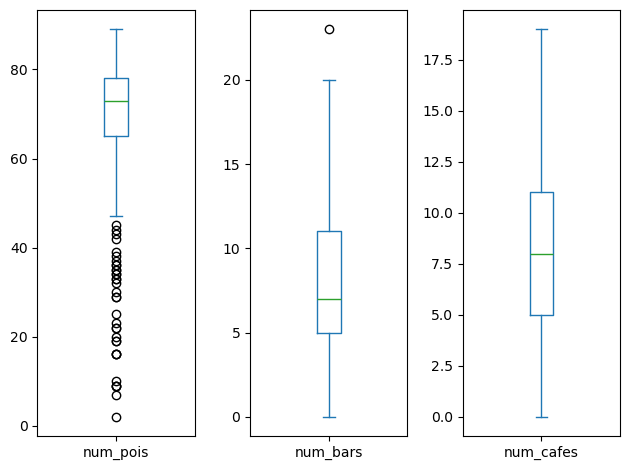

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=3)
stations_pois_df['num_pois'].plot.box(ax=axes[0])
stations_pois_df['num_bars'].plot.box(ax=axes[1])
stations_pois_df['num_cafes'].plot.box(ax=axes[2])
fig.tight_layout()

<Axes: >

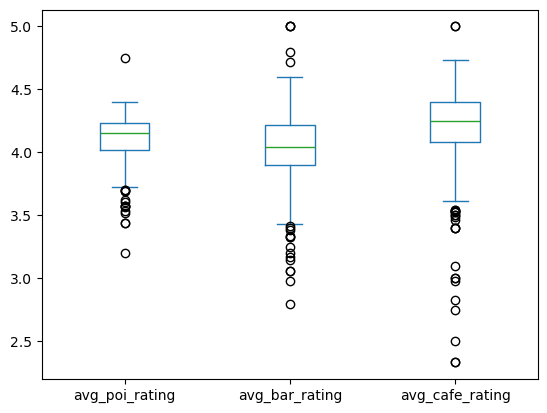

In [37]:
stations_pois_df[['avg_poi_rating', 'avg_bar_rating', 'avg_cafe_rating']].plot.box()

In [38]:
def drop_outliers(df: pd.DataFrame, col: str, low: float, high: float)-> pd.DataFrame:
    """
    Return a DataFrame with the outliers dropped from a column.
    """
    return df[df[col].between(low, high)]

In [39]:
# Drop outliers from stations_pois_df one column at a time.
cols = ['avg_poi_rating', 'num_pois', 'avg_bar_rating', 'num_bars', 'avg_cafe_rating', 'num_cafes']

tmp = stations_pois_df.copy()
q1 = tmp.describe().loc['25%', cols]
q3 = tmp.describe().loc['75%', cols]
iqr = q3 - q1
lows = q1 - 1.5 * iqr
highs = q3 + 1.5 * iqr

# There must be some way to write this as a loop!
stations_pois_df = tmp.pipe(drop_outliers, col=cols[0], low=lows.iloc[0], high=highs.iloc[0])\
    .pipe(drop_outliers, col=cols[1], low=lows.iloc[1], high=highs.iloc[1])\
    .pipe(drop_outliers, col=cols[2], low=lows.iloc[2], high=highs.iloc[2])\
    .pipe(drop_outliers, col=cols[3], low=lows.iloc[3], high=highs.iloc[3])\
    .pipe(drop_outliers, col=cols[4], low=lows.iloc[4], high=highs.iloc[4])\
    .pipe(drop_outliers, col=cols[5], low=lows.iloc[5], high=highs.iloc[5])

del tmp

In [41]:
stations_pois_df.describe()

,free_bikes,slots,altitude,avg_poi_rating,num_pois,avg_bar_rating,num_bars,avg_cafe_rating,num_cafes
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,7.531792,15.098266,618.913295,4.168463,74.156069,4.067879,9.104046,4.264373,9.271676
std,5.237985,5.573676,45.981019,0.118940,6.473913,0.214218,3.992819,0.201864,3.416982
min,0.000000,7.000000,535.000000,3.800000,48.000000,3.516667,2.000000,3.614286,1.000000
25%,4.000000,11.000000,584.000000,4.121053,71.000000,3.938462,6.000000,4.163636,7.000000
50%,6.000000,15.000000,617.000000,4.194366,75.000000,4.054545,9.000000,4.276923,9.000000
75%,10.000000,18.000000,652.000000,4.245070,78.000000,4.200000,12.000000,4.400000,12.000000
max,28.000000,40.000000,731.000000,4.386250,89.000000,4.600000,20.000000,4.712500,19.000000


array([[<Axes: title={'center': 'avg_poi_rating'}>,
        <Axes: title={'center': 'num_pois'}>],
       [<Axes: title={'center': 'avg_bar_rating'}>,
        <Axes: title={'center': 'num_bars'}>],
       [<Axes: title={'center': 'avg_cafe_rating'}>,
        <Axes: title={'center': 'num_cafes'}>]], dtype=object)

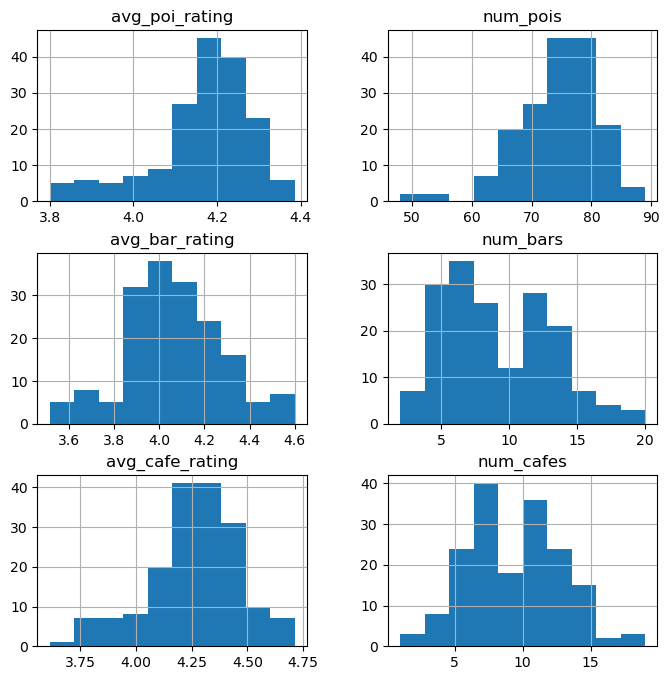

In [40]:
cols = ['avg_poi_rating', 'num_pois', 'avg_bar_rating', 'num_bars', 'avg_cafe_rating', 'num_cafes']
stations_pois_df[cols].hist(figsize = (8, 8))

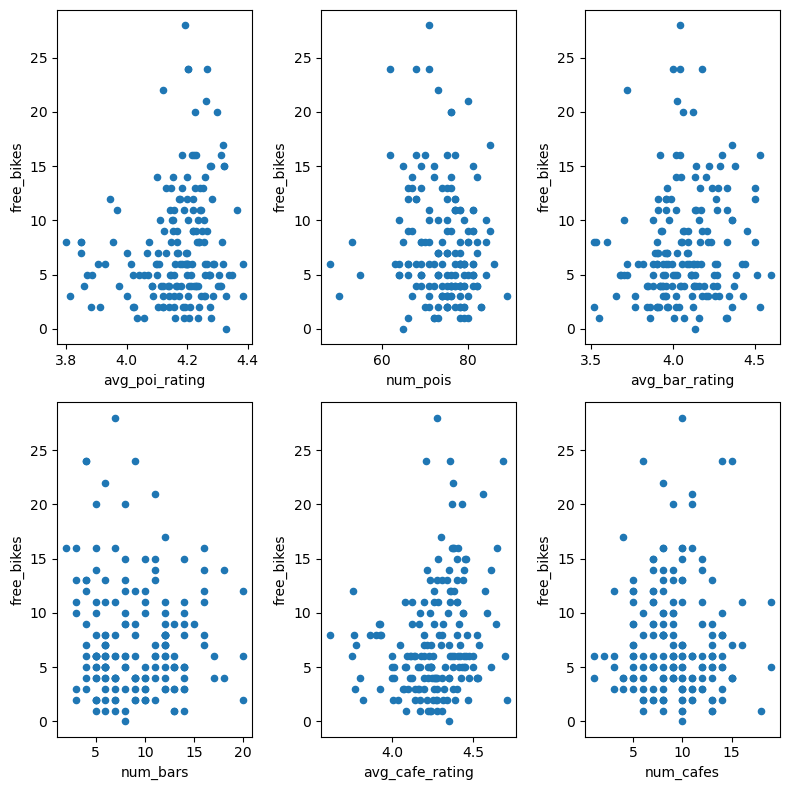

In [42]:
nrows = 2 
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 8))
num_axes = nrows * ncols
for idx in range(len(cols)):
    r = idx // ncols
    c = idx % ncols
    stations_pois_df.plot.scatter(x=cols[idx], y='free_bikes', ax=axes[r][c])
fig.tight_layout()

<Axes: >

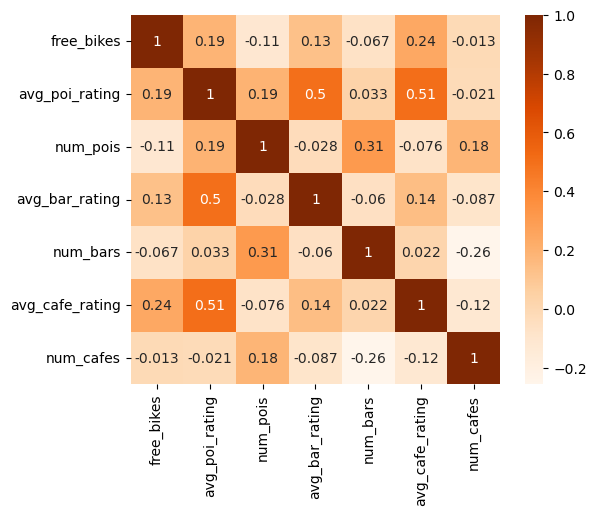

In [43]:
corr_df = stations_pois_df[['free_bikes'] + cols].corr()
sns.heatmap(corr_df, annot=True, square=True, cmap='Oranges')

#### Conclusions

Judging from the correlation matrix heat map above, none of the variables I selected for analysis (other than slots) correlate strongly with number of free bikes. I'll proceed with a regression analysis, but I don't think that the results will be particularly exciting.

# Database

### Put results in an SQLite database

In choosing which results to put into a SQL database, I chose the largely raw data from stations_places_categories_df rather than the more processed stations_dois_df. You can always redo data processing, but, generally, you can't undo aggregations and/or data drops. 

In [15]:
# Define a SQLite connection and cursor.
# Note that dirname was defined above.
con = sqlite3.connect(dirname + 'stations_places_cats.db')
cur = con.cursor()

In [16]:
stations_places_cats_df.dtypes

station_id        object
station_name      object
latitude         float64
longitude        float64
altitude         float64
slots              int64
free_bikes         int64
empty_slots        int64
yelp_id           object
place_name        object
review_count       int64
price            float64
rating           float64
distance         float64
category_name     object
dtype: object

In [17]:
# Define the SQLite table creation command before executing it.
sql_create_cmd = r"""
    CREATE TABLE stations_places_cats (
        station_id TEXT,
        station_name TEXT,
        latitude REAL,
        longitude REAL,
        altitude REAL,
        slots INTEGER,
        free_bikes INTEGER,
        empty_slots INTEGER,
        yelp_id TEXT,
        place_name TEXT,
        review_count INTEGER,
        price REAL,
        rating REAL,
        distance REAL,
        category_name TEXT
    );
"""
print(sql_create_cmd)


    CREATE TABLE stations_places_cats (
        station_id TEXT,
        station_name TEXT,
        latitude REAL,
        longitude REAL,
        altitude REAL,
        slots INTEGER,
        free_bikes INTEGER,
        empty_slots INTEGER,
        yelp_id TEXT,
        place_name TEXT,
        review_count INTEGER,
        price REAL,
        rating REAL,
        distance REAL,
        category_name TEXT
    );



In [18]:
cur.execute('DROP TABLE IF EXISTS stations_places_cats')
cur.execute(sql_create_cmd)

In [19]:
res = cur.execute('SELECT name FROM sqlite_master')
res.fetchone()

('stations_places_cats',)

I've successfully created a database. But it's empty. To fill it:

In [20]:
def sql_insert_cmd(df: pd.DataFrame, db: str, row: int) -> str:
    """
    Return the SQL command that will insert a DataFrame row into the database.
    """
    row_list = df.loc[row, :].to_list()
    row_str = str(row_list).replace('nan', 'NULL').replace('[', '(').replace(']', ')')
    return 'INSERT INTO ' + db + ' VALUES ' + row_str

In [21]:
for row in range(stations_places_cats_df.shape[0]):
    sql_cmd = sql_insert_cmd(stations_places_cats_df, 'stations_places_cats', row)
    cur.execute(sql_cmd)

In [22]:
con.commit()

I'll verify that inserting into the database woked as expected.

In [23]:
res = cur.execute('SELECT * FROM stations_places_cats')
records = res.fetchall()
print(f'num rows: {len(records)}, num cols: {len(records[0])}')
records[0]

num rows: 15212, num cols: 15


('e1593acef03a0fd770595370586bc358',
 'P31 - Estación Canal 13',
 -33.428334,
 -70.627312,
 599.0,
 13,
 6,
 7,
 '8N6Y3HsLXHBeFwhlO0YxwQ',
 'Barrica 94',
 78,
 2.0,
 4.3,
 988.6312698678696,
 'wine bars')

Phew!